# **Exploratory Data Analysis (EDA)**


#### Tarea 3

Traducción a español y tropicalización: `Tobias Alexander Santamaria Diaz`

Dataset a utilizar: https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset/data

Objetivos del Proyecto:

Explorar un conjunto de datos bancarios cusando R con Python.

## Acerca del conjunto de datos

Contexto : Una gran tienda está planeando las rebajas de fin de año. Quieren lanzar una nueva oferta: la membresía Gold, que ofrece un 20 % de descuento en todas las compras, por solo $ 499,  $ que es de$ $ 999 los demás días. Será válida solo para los clientes existentes y actualmente se está planificando la campaña a través de llamadas telefónicas para ellos. La gerencia cree que la mejor manera de reducir el costo de la campaña es crear un modelo predictivo que clasifique a los clientes que podrían comprar la oferta.

## Librerias

Importando las bibliotecas necesarias para este proyecto.

In [1]:
import os
os.environ['R_HOME'] = 'C:/Program Files/R/R-4.4.1'
import rpy2.robjects as ro

### Importar libreria

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.lib import grdevices
from IPython.display import Image

C:\Users\alex_\AppData\Local\Programs\Python\Python312\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [3]:
pd.set_option("display.precision", 2)
pd.options.display.float_format = '{:.2f}'.format

In [4]:
try: 
    # Definir el repositorio CRAN
    utils = importr('utils')
    utils.chooseCRANmirror(ind=1)  # Elige un espejo CRAN para descargar los paquetes
except Exception as e:
    print(f"Ocurrió un error al ajustar el modelo: {e}")

### Usando la conversion a R

In [5]:
# Activar la conversión entre pandas y R
pandas2ri.activate()

In [6]:
# Importar librerías de R necesarias
tidyverse = importr('tidyverse')
ggplot2 = importr('ggplot2')
glmnet = importr('glmnet')
tidymodels = importr('tidymodels')
caret = importr('caret')
rcompanion = importr('rcompanion')
pROC = importr('pROC')
rsample = importr('rsample')
dplyr = importr('dplyr')
plyr = importr('plyr')

### Cargando la dataset

In [7]:
## Leer el conjunto de datos en Python y convertirlo a un DataFrame de R
df = pd.read_csv("./datasets/superstore_data.csv")
##Muestar los primeros 5 datos
df.head(5)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.00,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.00,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.00,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.00,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.00,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


Cargamos los datos y definimos DataFrame. Leamos los datos y veamos las primeras 5 filas usando el método head.

In [8]:
# Asegurarse de que los nombres de las columnas no tengan espacios ni caracteres especiales
df.columns = df.columns.str.replace(' ', '_').str.replace('[^A-Za-z0-9_]', '')

In [9]:
rdf = pandas2ri.py2rpy(df)

Se convertir el `DataFreme` para trabajarlo en R


In [10]:
# Asignar el DataFrame de R a una variable de R para usar en los comandos posteriores
ro.globalenv['df'] = rdf

Se asigna el `DataFrame` en una variable para usar en R

## Revisemos el tamaño del Dataset, sus columnas y los tipos de datos

## Nombres de cada Columna

In [11]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

Nombre de las columnas 

Diccionario:

La descripción de los datos es la siguiente:

1. `Response` (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
2. `ID` - Unique ID of each customer
3. `Year_Birth` - Age of the customer
4. `Complain` - 1 if the customer complained in the last 2 years
5. `Dt_Customer` - date of customer's enrollment with the company
6. `Education` - customer's level of education
7. `Marital` - customer's marital status
8. `Kidhome` - number of small children in customer's household
9. `Teenhome` - number of teenagers in customer's household
10. `Income` - customer's yearly household income
11. `MntFishProducts` - the amount spent on fish products in the last 2 years
12. `MntMeatProducts` - the amount spent on meat products in the last 2 years
13. `MntFruits` - the amount spent on fruits products in the last 2 years
14. `MntSweetProducts` - amount spent on sweet products in the last 2 years
15. `MntWines` - the amount spent on wine products in the last 2 years
16. `MntGoldProds` - the amount spent on gold products in the last 2 years
14. `NumDealsPurchases` - number of purchases made with discount
15. `NumCatalogPurchases` - number of purchases made using catalog (buying goods to be shipped through the mail)
16. `NumStorePurchases` - number of purchases made directly in stores
17. `NumWebPurchases` - number of purchases made through the company's website
18. `NumWebVisitsMonth` - number of visits to company's website in the last month
19. `Recency` - number of days since the last purchase

Se visualiza la inforacion de todas las columnas del Dataframe 

### Analisis de datos

In [12]:
# Análisis de datos
print("ESTRCUTRA DE LOS DATOS: ")
ro.r('''
    # Estructura de los datos
    str(df)
''')

ESTRCUTRA DE LOS DATOS: 
'data.frame':	2240 obs. of  22 variables:
 $ Id                 : int  1826 1 10476 1386 5371 7348 4073 1991 4047 9477 ...
 $ Year_Birth         : int  1970 1961 1958 1967 1989 1958 1954 1967 1954 1954 ...
 $ Education          : chr  "Graduation" "Graduation" "Graduation" "Graduation" ...
 $ Marital_Status     : chr  "Divorced" "Single" "Married" "Together" ...
 $ Income             : num  84835 57091 67267 32474 21474 ...
 $ Kidhome            : int  0 0 0 1 1 0 0 0 0 0 ...
 $ Teenhome           : int  0 0 1 1 0 0 0 1 1 1 ...
 $ Dt_Customer        : chr  "6/16/2014" "6/15/2014" "5/13/2014" "11/5/2014" ...
 $ Recency            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ MntWines           : int  189 464 134 10 6 336 769 78 384 384 ...
 $ MntFruits          : int  104 5 11 0 16 130 80 0 0 0 ...
 $ MntMeatProducts    : int  379 64 59 1 24 411 252 11 102 102 ...
 $ MntFishProducts    : int  111 7 15 0 11 240 15 0 21 21 ...
 $ MntSweetProducts   : int  189 0 2 0 0 32 34 0 

El nombre y tipo de datos de las columnas del `DataSet`

In [13]:
## Primeras filas
ro.r('''
    # Primeras filas
    print(head(df))
    #mustra las primeras 6 filas del dataset
''')

     Id Year_Birth  Education Marital_Status Income Kidhome Teenhome
0  1826       1970 Graduation       Divorced  84835       0        0
1     1       1961 Graduation         Single  57091       0        0
2 10476       1958 Graduation        Married  67267       0        1
3  1386       1967 Graduation       Together  32474       1        1
4  5371       1989 Graduation         Single  21474       1        0
5  7348       1958        PhD         Single  71691       0        0
  Dt_Customer Recency MntWines MntFruits MntMeatProducts MntFishProducts
0   6/16/2014       0      189       104             379             111
1   6/15/2014       0      464         5              64               7
2   5/13/2014       0      134        11              59              15
3   11/5/2014       0       10         0               1               0
4    8/4/2014       0        6        16              24              11
5   3/17/2014       0      336       130             411             240
  MntS

Se muestra las primeras 6 filas del `DataFrame`

### Resumen estadistico

In [14]:
# Resumen estadístico
ro.r('''
    summary(df)  
''') 
#Muestra los valores max, min y media de cada columna

array(['Min.   :    0  ', '1st Qu.: 2828  ', 'Median : 5458  ',
       'Mean   : 5592  ', '3rd Qu.: 8428  ', 'Max.   :11191  ', None,
       'Min.   :1893  ', '1st Qu.:1959  ', 'Median :1970  ',
       'Mean   :1969  ', '3rd Qu.:1977  ', 'Max.   :1996  ', None,
       'Length:2240       ', 'Class :character  ', 'Mode  :character  ',
       None, None, None, None, 'Length:2240       ', 'Class :character  ',
       'Mode  :character  ', None, None, None, None, 'Min.   :  1730  ',
       '1st Qu.: 35303  ', 'Median : 51382  ', 'Mean   : 52247  ',
       '3rd Qu.: 68522  ', 'Max.   :666666  ', "NA's   :24  ",
       'Min.   :0.0000  ', '1st Qu.:0.0000  ', 'Median :0.0000  ',
       'Mean   :0.4442  ', '3rd Qu.:1.0000  ', 'Max.   :2.0000  ', None,
       'Min.   :0.0000  ', '1st Qu.:0.0000  ', 'Median :0.0000  ',
       'Mean   :0.5062  ', '3rd Qu.:1.0000  ', 'Max.   :2.0000  ', None,
       'Length:2240       ', 'Class :character  ', 'Mode  :character  ',
       None, None, None, None, 'Mi

Muestra los valores max, min y media de cada columna 

In [15]:
## Busca los valores NA
ro.r('''
    # Búsqueda de valores NA
    print(colSums(is.na(df)))
''') 


                 Id          Year_Birth           Education      Marital_Status 
                  0                   0                   0                   0 
             Income             Kidhome            Teenhome         Dt_Customer 
                 24                   0                   0                   0 
            Recency            MntWines           MntFruits     MntMeatProducts 
                  0                   0                   0                   0 
    MntFishProducts    MntSweetProducts        MntGoldProds   NumDealsPurchases 
                  0                   0                   0                   0 
    NumWebPurchases NumCatalogPurchases   NumStorePurchases   NumWebVisitsMonth 
                  0                   0                   0                   0 
           Response            Complain 
                  0                   0 


In [16]:
## Busca los valores NA y los elimina
ro.r('''
    # Eliminar el valor NA
    df = na.omit(df)
    colSums(is.na(df))
    str(df)
''') 

'data.frame':	2216 obs. of  22 variables:
 $ Id                 : int  1826 1 10476 1386 5371 7348 4073 1991 4047 9477 ...
 $ Year_Birth         : int  1970 1961 1958 1967 1989 1958 1954 1967 1954 1954 ...
 $ Education          : chr  "Graduation" "Graduation" "Graduation" "Graduation" ...
 $ Marital_Status     : chr  "Divorced" "Single" "Married" "Together" ...
 $ Income             : num  84835 57091 67267 32474 21474 ...
 $ Kidhome            : int  0 0 0 1 1 0 0 0 0 0 ...
 $ Teenhome           : int  0 0 1 1 0 0 0 1 1 1 ...
 $ Dt_Customer        : chr  "6/16/2014" "6/15/2014" "5/13/2014" "11/5/2014" ...
 $ Recency            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ MntWines           : int  189 464 134 10 6 336 769 78 384 384 ...
 $ MntFruits          : int  104 5 11 0 16 130 80 0 0 0 ...
 $ MntMeatProducts    : int  379 64 59 1 24 411 252 11 102 102 ...
 $ MntFishProducts    : int  111 7 15 0 11 240 15 0 21 21 ...
 $ MntSweetProducts   : int  189 0 2 0 0 32 34 0 32 32 ...
 $ MntGoldProds

Se eliminan los valores NA y se imprime los datos nuevamente sin los valores NA

### Analisis de la data por graficos

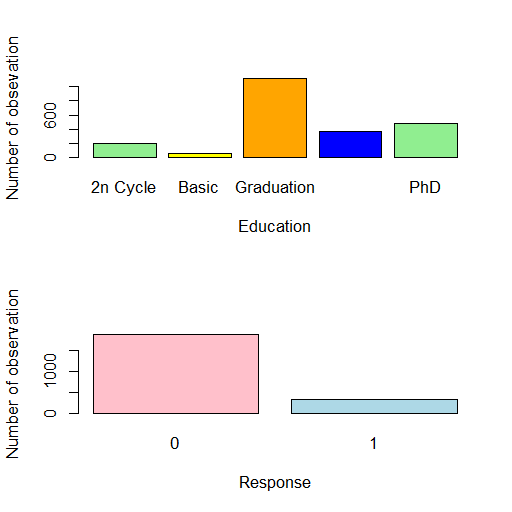

In [17]:
# Abrir el dispositivo gráfico para guardar el gráfico como PNG
grdevices.png(file="plot.png", width=512, height=512, res=100)

## Busca los valores NA y los elimina
ro.r('''
    # Visualice los datos y obtenga información sin procesar

    par(mfrow = c(2,1))
    barplot(table(df$Education), col = c("lightgreen", "yellow","orange","blue"), 
        ylab = "Number of obsevation", 
        xlab = "Education")
    # Muestra la relacion de la cantidad de nivel academico de los clientes.
    barplot(table(df$Response), col = c("pink","lightblue"),
        ylab = "Number of observation", xlab = "Response")
    # Muestra la relacion de la cantida de clientes que aceptaron la campaña de ofertas
''') 
# Verificar si algún dispositivo gráfico está abierto antes de cerrarlo
if grdevices.dev_cur()[0] != 1:  # Verifica si el dispositivo no es el "null device"
    grdevices.dev_off()
# Mostrar el gráfico en el cuaderno Jupyter
Image(filename="plot.png")

1. La primera grafica muestra la relacion de la cantidad de nivel academico de los clientes, la yoria de clintes tiene un nivel academico de `Gradutaion`.
2. La segunda grafica muestra la relacion de la cantida de clientes que aceptaron la campaña de ofertas, observando que son pocos los clientes que aceptaron la campaña de ofertas (`1`)

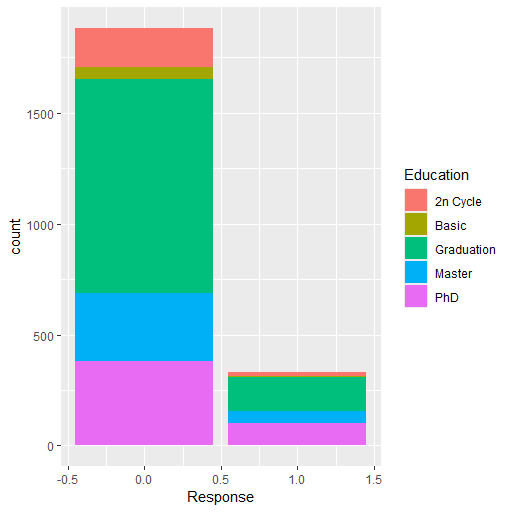

In [18]:
# Abrir el dispositivo gráfico para guardar el gráfico como PNG
grdevices.png(file="plot.png", width=512, height=512, res=100)

ro.r('''
    # Vea visualmente la educación predeterminada
    plot <- ggplot(df, aes(Response, fill = Education)) + geom_bar()
    # Muestra 2 columnas la primera son quienes No aceptaron la campaña y la segunda son quienes SI aceptaron la campaña

    print(plot)
    
''') 

# Verificar si algún dispositivo gráfico está abierto antes de cerrarlo
if grdevices.dev_cur()[0] != 1:  # Verifica si el dispositivo no es el "null device"
    grdevices.dev_off()
# Mostrar el gráfico en el cuaderno Jupyter
Image(filename="plot.png")

La grafica Muestra 2 columnas, la primera agrupa por nivel de educacion quienes No aceptaron la campaña de ofertas.
y la segunda muestra agrupado por educacion quienes SI aceptaron la campaña de ofertas.

In [19]:
# Construcción de modelos para predecir el uso de la campaña de oferta
ro.r('''
    # Construcción de modelos para predecir el uso de la campaña de oferta

    set.seed(421)
    split = initial_split(df, prop = 0.8, strata = Response)
    train = split %>% 
      training()
    val_test= split %>% 
      testing()

    str(train)
    str(val_test)
''') 

'data.frame':	1772 obs. of  22 variables:
 $ Id                 : int  10476 4047 9477 2079 5642 2964 1473 2795 2285 115 ...
 $ Year_Birth         : int  1958 1954 1954 1947 1979 1981 1960 1958 1954 1966 ...
 $ Education          : chr  "Graduation" "PhD" "PhD" "2n Cycle" ...
 $ Marital_Status     : chr  "Married" "Married" "Married" "Married" ...
 $ Income             : num  67267 65324 65324 81044 62499 ...
 $ Kidhome            : int  0 0 0 0 1 0 0 2 0 0 ...
 $ Teenhome           : int  1 1 1 0 0 0 1 1 1 1 ...
 $ Dt_Customer        : chr  "5/13/2014" "11/1/2014" "11/1/2014" "12/27/2013" ...
 $ Recency            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ MntWines           : int  134 384 384 450 140 3 53 5 213 275 ...
 $ MntFruits          : int  11 0 0 26 4 10 1 0 9 11 ...
 $ MntMeatProducts    : int  59 102 102 535 61 8 5 3 76 68 ...
 $ MntFishProducts    : int  15 21 21 73 0 3 2 0 4 25 ...
 $ MntSweetProducts   : int  2 32 32 98 13 16 1 0 3 7 ...
 $ MntGoldProds       : int  30 5 5 26 4 3

Construcción de modelos para predecir el uso de la campaña de oferta

In [20]:
try:
    # Se define el Modelo-1
    ro.r('''
        # Modelo-1
        log_lr = glm(Response ~.,family = "binomial", train)
        print(summary(log_lr))

        # Este resultado proporciona información sobre los coeficientes, su importancia, el ajuste del modelo y la calidad. 
        # Los puntos clave a tener en cuenta son la importancia de los coeficientes, la desviación del modelo y el valor AIC 
        # Se puede observar del resultado que El modelo hace su coeficiente depende por el valor que este ingreasdo en cada columna por el cual 
        # la fecha en que se registraron en la tienda se etiende con varios valores ya que varia mucho en la fecha de registro del cliente.
    ''') 
except Exception as e:
    print(f"Ocurrió un error al ajustar el modelo: {e}")


Call:
glm(formula = Response ~ ., family = "binomial", data = train)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             8.161e+01  3.495e+04   0.002  0.99814    
Id                     -8.712e-05  4.849e-05  -1.797  0.07240 .  
Year_Birth             -1.733e-02  1.635e-02  -1.060  0.28926    
EducationBasic         -4.491e+00  1.520e+00  -2.954  0.00314 ** 
EducationGraduation    -3.745e-01  6.156e-01  -0.608  0.54299    
EducationMaster         6.229e-01  6.854e-01   0.909  0.36346    
EducationPhD            3.254e-01  7.223e-01   0.451  0.65231    
Marital_StatusAlone    -4.295e+01  3.495e+04  -0.001  0.99902    
Marital_StatusDivorced -4.400e+01  3.495e+04  -0.001  0.99900    
Marital_StatusMarried  -4.642e+01  3.495e+04  -0.001  0.99894    
Marital_StatusSingle   -4.467e+01  3.495e+04  -0.001  0.99898    
Marital_StatusTogether -4.655e+01  3.495e+04  -0.001  0.99894    
Marital_StatusWidow    -4.290e+01  3.495e+04  -0.001  0.9

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Este resultado proporciona información sobre los coeficientes, su importancia, el ajuste del modelo y la calidad. 
Los puntos clave a tener en cuenta son la importancia de los coeficientes, la desviación del modelo y el valor AIC 
Se puede observar del resultado que el modelo hace su coeficiente dependiendo por el valor que este ingreasdo en cada columna por el cual 
la fecha de registro de los clientes en la tienda se extiende con varios valores ya que varia mucho en la fecha de registro del cliente.

In [21]:
try:
    # 
    ro.r('''
        # Exactitud de mapeo para el modelo de predicción de la aceptacion de la campaña de ofertas
        prd_Val = predict(log_lr, type='response')
        prd_default = ifelse(prd_Val > 0.5, 1, 0)
        cnf_m = table(prd=prd_default, act=train$Response)
        print(confusionMatrix(cnf_m))

        # Aquí obtenemos una buena precisión del modelo, de alrededor del 95 %.
    ''') 
except Exception as e:
    print(f"Ocurrió un error al ajustar el modelo: {e}")

Confusion Matrix and Statistics

   act
prd    0    1
  0 1473   53
  1   33  213
                                         
               Accuracy : 0.9515         
                 95% CI : (0.9404, 0.961)
    No Information Rate : 0.8499         
    P-Value [Acc > NIR] : < 2e-16        
                                         
                  Kappa : 0.8037         
                                         
 Mcnemar's Test P-Value : 0.04048        
                                         
            Sensitivity : 0.9781         
            Specificity : 0.8008         
         Pos Pred Value : 0.9653         
         Neg Pred Value : 0.8659         
             Prevalence : 0.8499         
         Detection Rate : 0.8313         
   Detection Prevalence : 0.8612         
      Balanced Accuracy : 0.8894         
                                         
       'Positive' Class : 0              
                                         


Exactitud de mapeo para el modelo de predicción de la aceptacion de la campaña de ofertas
Se puede observa que obtenemos una buena precisión del modelo, de alrededor del 95 %.

In [22]:
# #Explorar la distribución de la variable objetivo
ro.r('''
    #Explorar la distribución de la variable objetivo
    # Muestra la cantidad de personas que Reclamaron (1) y los que NO Reclamaron (0)
    print(table(df$Complain))              
''') 



   0    1 
2195   21 


Muestra la cantidad de personas que Reclamaron (`1`) y los que NO Reclamaron (`0`)

In [23]:
# Crea el conjunto de personas que hicieron reclamo (1) y No reclamaron (0)
ro.r('''
    #Crea el conjunto de personas que hicieron reclamo (1) y No reclamaron (0)
    Complain <- df[df$Complain == 1,]
    stay <- df[df$Complain == 0,]
''') 


Crea el conjunto de personas que hicieron reclamo (`1`) y No reclamaron (`0`)

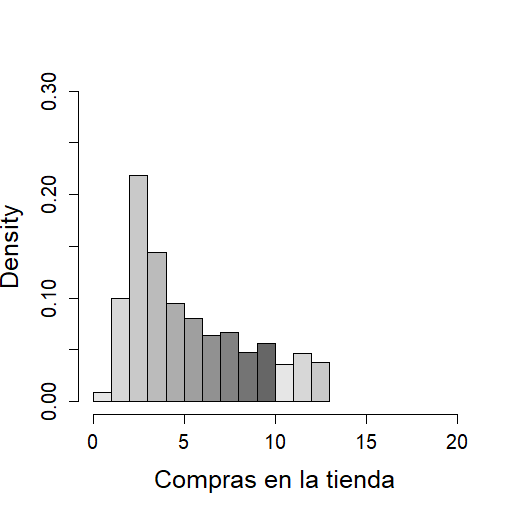

In [24]:
# Abrir el dispositivo gráfico para guardar el gráfico como PNG
grdevices.png(file="plot.png", width=512, height=512, res=100)

ro.r('''
    #---Compras en la tienda---
    hist(df$NumStorePurchases,main=NULL,xlab="Compras en la tienda",ylab="Density",col=gray(seq(0.9,0.4,length=10)),cex.axis=1.2,cex.lab=1.5,font.lab=1,freq=FALSE,xlim=c(0,20),ylim=c(0,0.3))
''') 

# Verificar si algún dispositivo gráfico está abierto antes de cerrarlo
if grdevices.dev_cur()[0] != 1:  # Verifica si el dispositivo no es el "null device"
    grdevices.dev_off()
# Mostrar el gráfico en el cuaderno Jupyter
Image(filename="plot.png")

Se muestra la relacion de la densidad de la porblacion con el numeros de productos comprados en la tienda, el cual se oobserva que el punto de mas alto son `2` productos comprados empezando a descender la cantidad hasta mantenerse en un media `9 a 12` productos.

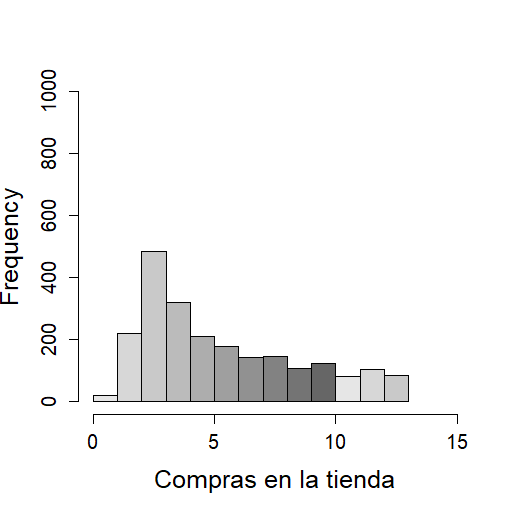

In [25]:
# Abrir el dispositivo gráfico para guardar el gráfico como PNG
grdevices.png(file="plot.png", width=512, height=512, res=100)

ro.r('''
    #---Compras en la tienda---
    hist(df$NumStorePurchases,main=NULL,xlab="Compras en la tienda",ylab="Frequency",col=gray(seq(0.9,0.4,length=10)),cex.axis=1.2,cex.lab=1.5,font.lab=1,freq=TRUE,xlim=c(0,15),ylim=c(0,1000))
''') 

# Verificar si algún dispositivo gráfico está abierto antes de cerrarlo
if grdevices.dev_cur()[0] != 1:  # Verifica si el dispositivo no es el "null device"
    grdevices.dev_off()
# Mostrar el gráfico en el cuaderno Jupyter
Image(filename="plot.png")

Se muestra la relacion de la frecuencia de la porblacion con el numero de compras realizados en la tienda, el cual se oobserva que el punto de mas alto son `2` productos con una frecunecia aproximada de `500` compras empezando a descender la cantidad hasta mantenerse en un media `6 a 12` productos con una frecuencia aproximadamente de `170`.

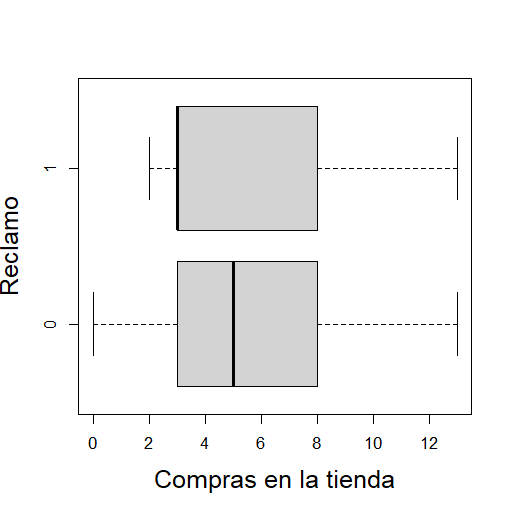

In [26]:
# Abrir el dispositivo gráfico para guardar el gráfico como PNG
grdevices.png(file="plot.png", width=512, height=512, res=100)

ro.r('''
    #---Compras en la tienda---
    boxplot(NumStorePurchases~Complain,df,horizontal=TRUE,xlab="Compras en la tienda",ylab="Reclamo",cex.lab=1.5,font.lab=1)
    # Se muestra la relacion de las personas que hicieron reclamos por la cantidad de compras realizadas en "tienda" se puede observar que 3 es la media de reclamos
    # y 5 la media que no Reclamaron, pero el cuadrante mas alto de reclamos son quienes compraron 13 productos por en la tienda, teniendo un punto importante a considerar por el tiempo que les lleva pasar en una caja.
''') 

# Verificar si algún dispositivo gráfico está abierto antes de cerrarlo
if grdevices.dev_cur()[0] != 1:  # Verifica si el dispositivo no es el "null device"
    grdevices.dev_off()
# Mostrar el gráfico en el cuaderno Jupyter
Image(filename="plot.png")

Se muestra la relacion de las personas que hicieron reclamos por la cantidad de compras realizadas en "tienda" se puede observar que 3 es la media de reclamos y 5 la media que no Reclamaron, pero el cuadrante mas alto de reclamos son quienes compraron 13 productos por en la tienda, teniendo un punto importante a considerar por el tiempo que les lleva pasar en una caja.

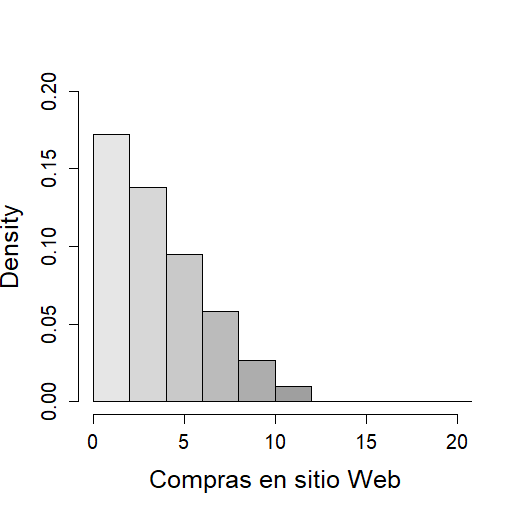

In [27]:
# Abrir el dispositivo gráfico para guardar el gráfico como PNG
grdevices.png(file="plot.png", width=512, height=512, res=100)

ro.r('''
    #---Compras en sitio Web---
    hist(df$NumWebPurchases,main=NULL,xlab="Compras en sitio Web",ylab="Density",col=gray(seq(0.9,0.4,length=10)),cex.axis=1.2,cex.lab=1.5,font.lab=1,freq=FALSE,xlim=c(0,20),ylim=c(0,0.2))
''') 

# Verificar si algún dispositivo gráfico está abierto antes de cerrarlo
if grdevices.dev_cur()[0] != 1:  # Verifica si el dispositivo no es el "null device"
    grdevices.dev_off()
# Mostrar el gráfico en el cuaderno Jupyter
Image(filename="plot.png")

Se muestra la relacion de la densidad de la porblacion con el numero deprodcutos comprados desde el sitio web, el cual se oobserva que el punto de mas alto son 1 producto comprado, empezando a descender la cantidad.

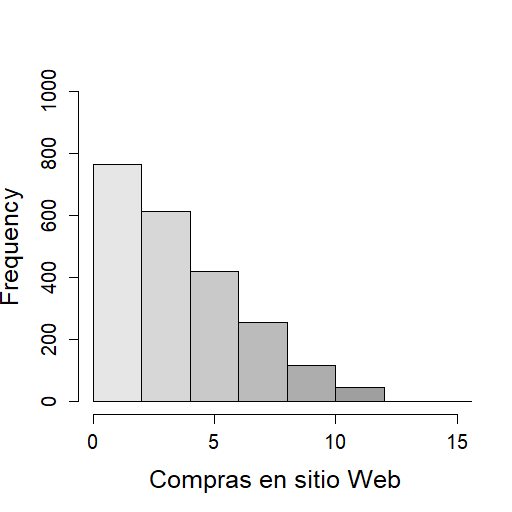

In [28]:
# Abrir el dispositivo gráfico para guardar el gráfico como PNG
grdevices.png(file="plot.png", width=512, height=512, res=100)

ro.r('''
    #---Compras en sitio Web---
    hist(df$NumWebPurchases,main=NULL,xlab="Compras en sitio Web",ylab="Frequency",col=gray(seq(0.9,0.4,length=10)),cex.axis=1.2,cex.lab=1.5,font.lab=1,freq=TRUE,xlim=c(0,15),ylim=c(0,1000))
''') 

# Verificar si algún dispositivo gráfico está abierto antes de cerrarlo
if grdevices.dev_cur()[0] != 1:  # Verifica si el dispositivo no es el "null device"
    grdevices.dev_off()
# Mostrar el gráfico en el cuaderno Jupyter
Image(filename="plot.png")

Se muestra la relacion de la frecuencia de la porblacion con el numero de compras realizados en la tienda, el cual se oobserva que el punto de mas alto son 1 a 3 productos con una frecunecia aproximada de 790 compras empezando a descender la cantidad.

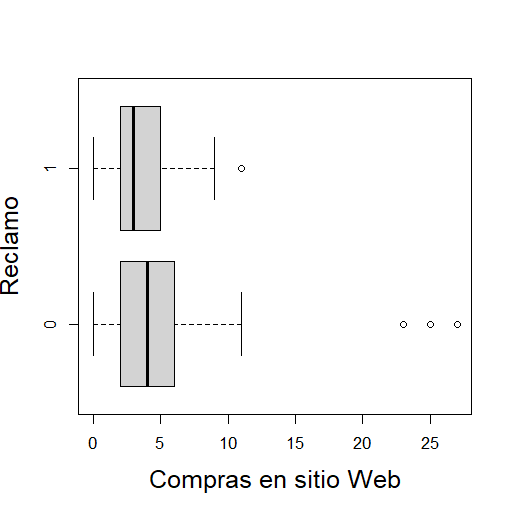

In [29]:
# Abrir el dispositivo gráfico para guardar el gráfico como PNG
grdevices.png(file="plot.png", width=512, height=512, res=100)

ro.r('''
    boxplot(NumWebPurchases~Complain,df,horizontal=TRUE,xlab="Compras en sitio Web",ylab="Reclamo",cex.lab=1.5,font.lab=1)
    # Se muestra la relacion de las personas que hicieron reclamos por la cantidad de compras realizadas en "Sitio Web" se puede observar que 3 es la media de reclamos
    # y 4 No, pero el cuadrante mas alto de reclamos son quienes compraron 9 productos por el sitio web.

''') 

# Verificar si algún dispositivo gráfico está abierto antes de cerrarlo
if grdevices.dev_cur()[0] != 1:  # Verifica si el dispositivo no es el "null device"
    grdevices.dev_off()
# Mostrar el gráfico en el cuaderno Jupyter
Image(filename="plot.png")

Se muestra la relacion de las personas que hicieron reclamos por la cantidad de compras realizadas en "Sitio Web" se puede observar que 3 es la media de reclamos y una media de `4` que No Reclamaron, pero el cuadrante mas alto de reclamos son quienes compraron `9` productos por el sitio web.

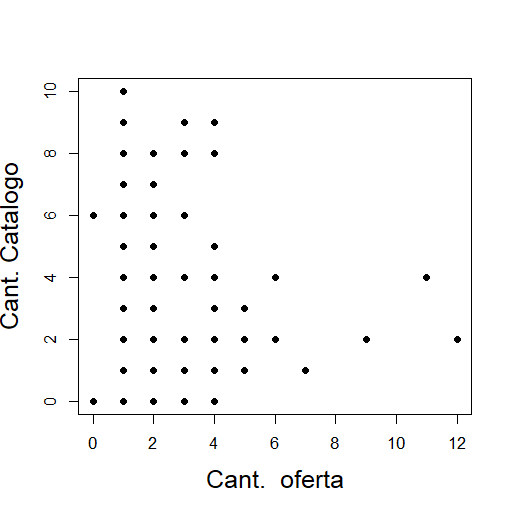

In [30]:
# Abrir el dispositivo gráfico para guardar el gráfico como PNG
grdevices.png(file="plot.png", width=512, height=512, res=100)

ro.r('''
    # Diagrama de dispersión entre dos variables numéricas (muestra de datos)
    df.sample <- df[1:200,]
    plot(df.sample$NumDealsPurchases,df.sample$NumCatalogPurchases,xlab="Cant.  oferta",ylab="Cant. Catalogo",cex.lab=1.5,font.lab=1,pch=19)
    # Se puede observa que la cantidad de productos comprado en catalogo 4 de esos producto eran con descuento, pero teniendo un punto 
    # disperso de 12 productos con ofertas entre ellos estan 2 que fueron realizados desde catalogo. 

''') 

# Verificar si algún dispositivo gráfico está abierto antes de cerrarlo
if grdevices.dev_cur()[0] != 1:  # Verifica si el dispositivo no es el "null device"
    grdevices.dev_off()
# Mostrar el gráfico en el cuaderno Jupyter
Image(filename="plot.png")

Se puede observa que la cantidad de productos comprados en `catalogo` 4 de esos producto eran con descuento, pero teniendo un punto disperso de 12 productos con ofertas entre ellos estan 2 que fueron realizados desde catalogo.

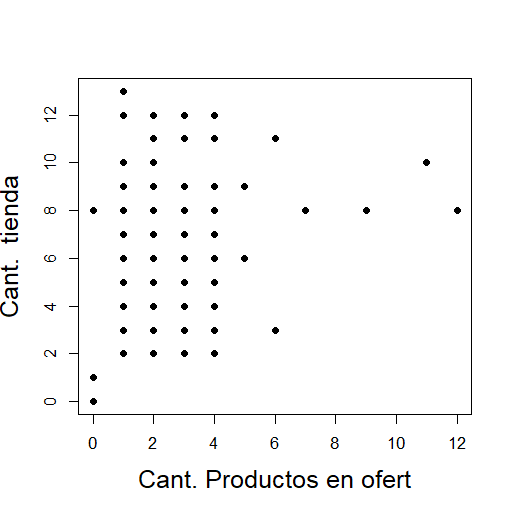

In [31]:
# Abrir el dispositivo gráfico para guardar el gráfico como PNG
grdevices.png(file="plot.png", width=512, height=512, res=100)

ro.r('''
    # Diagrama de dispersión entre dos variables numéricas (muestra de datos)
    df.sample <- df[1:200,]
    plot(df.sample$NumDealsPurchases,df.sample$NumStorePurchases,xlab="Cant. Productos en ofert",ylab="Cant.  tienda",cex.lab=1.5,font.lab=1,pch=19)
    # Se puede observa que la cantidad de productos comprado en la tienda 4 de esos producto eran con descuento, pero teniendo un punto 
    # disperso de 12 productos con ofertas entre ellos estan 8 que fueron realizados desde tienda. 

''') 

# Verificar si algún dispositivo gráfico está abierto antes de cerrarlo
if grdevices.dev_cur()[0] != 1:  # Verifica si el dispositivo no es el "null device"
    grdevices.dev_off()
# Mostrar el gráfico en el cuaderno Jupyter
Image(filename="plot.png")

Se puede observa que la cantidad de productos comprado en `tienda` 4 de esos producto eran con descuento, pero teniendo un punto disperso de 12 productos con ofertas entre ellos estan 8 que fueron realizados desde tienda.

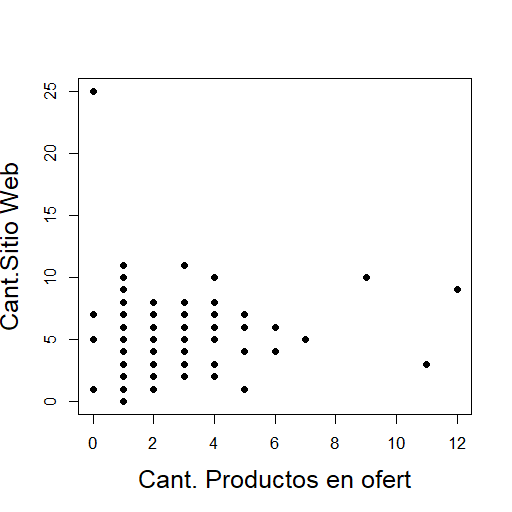

In [32]:
# Abrir el dispositivo gráfico para guardar el gráfico como PNG
grdevices.png(file="plot.png", width=512, height=512, res=100)

ro.r('''
    # Diagrama de dispersión entre dos variables numéricas (muestra de datos)
    df.sample <- df[1:200,]
    plot(df.sample$NumDealsPurchases,df.sample$NumWebPurchases,xlab="Cant. Productos en ofert",ylab="Cant.Sitio Web",cex.lab=1.5,font.lab=1,pch=19)
    # Se puede observa que la cantidad de productos comprado en sitio web a de 1 a 4 de esos producto eran con descuento, pero teniendo un punto disperso 
    # de 12 productos con ofertas entre ellos estan 10 que fueron realizados desde sitio web.o 

''') 

# Verificar si algún dispositivo gráfico está abierto antes de cerrarlo
if grdevices.dev_cur()[0] != 1:  # Verifica si el dispositivo no es el "null device"
    grdevices.dev_off()
# Mostrar el gráfico en el cuaderno Jupyter
Image(filename="plot.png")

Se puede observa que la cantidad de productos comprado en `sitio web` a de 1 a 4 de esos producto eran con descuento, pero teniendo un punto disperso de 12 productos con ofertas entre ellos estan 10 que fueron realizados desde sitio web.

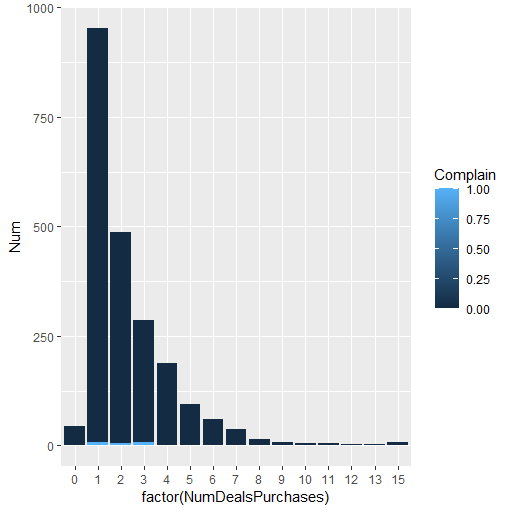

In [33]:
# Abrir el dispositivo gráfico para guardar el gráfico como PNG
grdevices.png(file="plot.png", width=512, height=512, res=100)

ro.r('''
    #  ---NumDealsPurchases---
    sum.NumDealsPurchases <- count(df,c("Complain","NumDealsPurchases"))
    names(sum.NumDealsPurchases)[3] <- "Num"
    plot <- ggplot(sum.NumDealsPurchases,aes(factor(NumDealsPurchases),Num,fill = Complain)) + geom_bar(stat="identity", position = "dodge") + scale_color_distiller(palette = "Set1")
    # Muestra todas las cantidad de productos comprados y en cuales se hicieron los reclamos segun la cantidad de productos comprados en descuentoa

    print(plot)

''') 

# Verificar si algún dispositivo gráfico está abierto antes de cerrarlo
if grdevices.dev_cur()[0] != 1:  # Verifica si el dispositivo no es el "null device"
    grdevices.dev_off()
# Mostrar el gráfico en el cuaderno Jupyter
Image(filename="plot.png")

Muestra todas las cantidad de productos comprados y en cuales se hicieron los reclamos, segun la cantidad de productos comprados en descuento

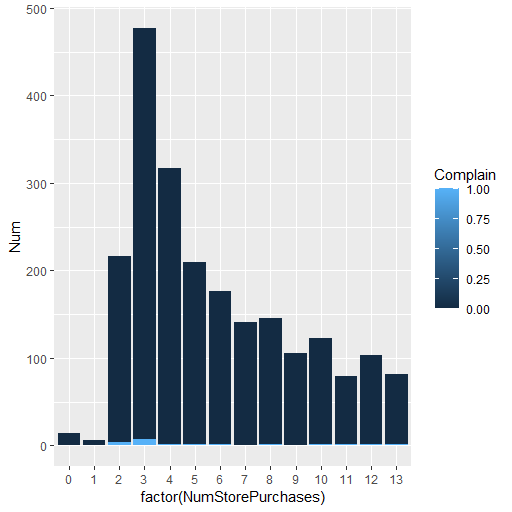

In [34]:
# Abrir el dispositivo gráfico para guardar el gráfico como PNG
grdevices.png(file="plot.png", width=512, height=512, res=100)

ro.r('''
    #  ---NumStorePurchases---
    sum.NumStorePurchases <- count(df,c("Complain","NumStorePurchases"))
    names(sum.NumStorePurchases)[3] <- "Num"
    plot <- ggplot(sum.NumStorePurchases,aes(factor(NumStorePurchases),Num,fill = Complain)) + geom_bar(stat="identity", position = "dodge") + scale_color_distiller(palette = "Set1")
    # Muestra todas las cantidad de productos comprados y en cuales se hicieron los reclamos segun la cantidad de productos comprados en la tienda

    print(plot)

''') 

# Verificar si algún dispositivo gráfico está abierto antes de cerrarlo
if grdevices.dev_cur()[0] != 1:  # Verifica si el dispositivo no es el "null device"
    grdevices.dev_off()
# Mostrar el gráfico en el cuaderno Jupyter
Image(filename="plot.png")

Muestra todas las cantidad de productos comprados y en cuales se hicieron los reclamos segun la cantidad de productos comprados en la tienda

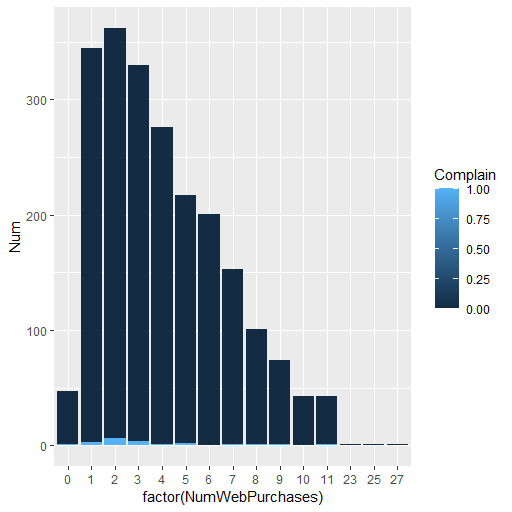

In [35]:
# Abrir el dispositivo gráfico para guardar el gráfico como PNG
grdevices.png(file="plot.png", width=512, height=512, res=100)

ro.r('''
    #  ---NumWebPurchases---
    sum.NumWebPurchases <- count(df,c("Complain","NumWebPurchases"))
    names(sum.NumWebPurchases)[3] <- "Num"
    plot <- ggplot(sum.NumWebPurchases,aes(factor(NumWebPurchases),Num,fill = Complain)) + geom_bar(stat="identity", position = "dodge") + scale_color_distiller(palette = "Set1")
    # Muestra todas las cantidad de productos comprados y en cuales se hicieron los reclamos segun la cantidad de productos comprados en sitio web

    print(plot)

''') 

# Verificar si algún dispositivo gráfico está abierto antes de cerrarlo
if grdevices.dev_cur()[0] != 1:  # Verifica si el dispositivo no es el "null device"
    grdevices.dev_off()
# Mostrar el gráfico en el cuaderno Jupyter
Image(filename="plot.png")

Muestra todas las cantidad de productos comprados y en cuales se hicieron los reclamos segun la cantidad de productos comprados en sitio web

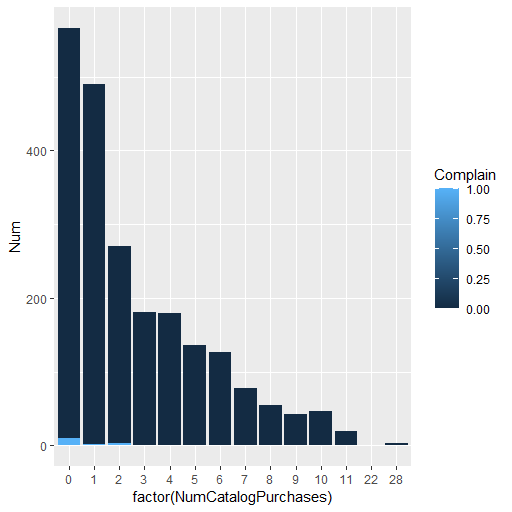

In [36]:
# Abrir el dispositivo gráfico para guardar el gráfico como PNG
grdevices.png(file="plot.png", width=512, height=512, res=100)

ro.r('''
    #  ---NumCatalogPurchases---
    sum.NumCatalogPurchases <- count(df,c("Complain","NumCatalogPurchases"))
    names(sum.NumCatalogPurchases)[3] <- "Num"
    plot <- ggplot(sum.NumCatalogPurchases,aes(factor(NumCatalogPurchases),Num,fill = Complain)) + geom_bar(stat="identity", position = "dodge") + scale_color_distiller(palette = "Set1")
    # Muestra todas las cantidad de productos comprados y en cuales se hicieron los reclamos segun la cantidad de productos comprados por catalogo

    print(plot)

''') 

# Verificar si algún dispositivo gráfico está abierto antes de cerrarlo
if grdevices.dev_cur()[0] != 1:  # Verifica si el dispositivo no es el "null device"
    grdevices.dev_off()
# Mostrar el gráfico en el cuaderno Jupyter
Image(filename="plot.png")

Muestra todas las cantidad de productos comprados y en cuales se hicieron los reclamos segun la cantidad de productos comprados por catalogo